This LSTM predicts the closing price of company data. Here we are using Apple stock data


In [78]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [56]:
#Importing the data
df = pd.read_csv("AAPL.csv")

#Looking at Datafreme
df


C:\Users\dixit\AppData\Local\Temp\ipykernel_3380\1663567594.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-02-01,74.059998,75.150002,73.797501,75.087502,72.960457,135480400
1,2020-03-01,74.287498,75.144997,74.125000,74.357498,72.251137,146322800
2,2020-06-01,73.447502,74.989998,73.187500,74.949997,72.826851,118387200
3,2020-07-01,74.959999,75.224998,74.370003,74.597504,72.484352,108872000
4,2020-08-01,74.290001,76.110001,74.290001,75.797501,73.650352,132079200
...,...,...,...,...,...,...,...
1093,2024-07-05,183.449997,184.899994,181.320007,182.399994,182.152924,77305800
1094,2024-08-05,182.850006,183.070007,181.449997,182.740005,182.492477,45057100
1095,2024-09-05,182.559998,184.660004,182.110001,184.570007,184.320007,48983000
1096,2024-10-05,184.899994,185.089996,182.130005,183.050003,183.050003,50759500


In [58]:
#Extracting only closing data to a dataframe because we need that one only
data = np.array(df['Close'])

#Reshaping the data
data = data.reshape(len(data),1)

#Scaling the data between 0 to 1
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(data) 
data

array([[0.13375114],
       [0.1286109 ],
       [0.13278292],
       ...,
       [0.90465968],
       [0.89395675],
       [0.91670039]])

In [59]:
#now we make a methold that makes the data that goes in our LTSM model
def data_maker(data, interval):
    x=[]
    y=[]
    for i in range(0,len(data)-interval):
        x.append(data[i:i+interval])
        y.append(data[i+interval])
    return np.array(x),np.array(y)

#deciding training and testing len
trainlen = int(len(data)*0.8)
testlen = len(data)- trainlen

#Setting previous days 
interval = 3
xtrain,ytrain = data_maker(data[0:trainlen],interval)
xtest,ytest = data_maker(data[trainlen:],interval)

#Reshaping the data
xtrain.reshape(len(xtrain),interval,1)
xtest.reshape(len(xtest),interval,1)

#Orignal Ytest without scaling for future refrence
ytesto = df.iloc[trainlen+interval:].set_index("Date", drop ="True")[['Close']]

xtrain.shape

(875, 3, 1)

In [60]:
#Making nural network with LSTM
model = Sequential()
model.add(LSTM(50 , return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(LSTM(50, return_sequences=False,))
model.add(Dense(25))
model.add(Dense(25))
model.add(Dense(1))


In [61]:
#Compile our model
model.compile(optimizer='adam',loss='mean_squared_error')

In [62]:
#Training our model
#Below code if for stochastic gradient decend
#model.fit(xtrain,ytrain,batch_size = 1,epochs=10)
model.fit(xtrain,ytrain,epochs=50)


Epoch 1/50
28/28 [==============================] - 10s 14ms/step - loss: 0.0826
Epoch 2/50
28/28 [==============================] - 0s 14ms/step - loss: 0.0137
Epoch 3/50
28/28 [==============================] - 0s 12ms/step - loss: 0.0043
Epoch 4/50
28/28 [==============================] - 0s 12ms/step - loss: 8.2900e-04
Epoch 5/50
28/28 [==============================] - 0s 12ms/step - loss: 6.9647e-04
Epoch 6/50
28/28 [==============================] - 0s 11ms/step - loss: 6.7466e-04
Epoch 7/50
28/28 [==============================] - 0s 12ms/step - loss: 6.9724e-04
Epoch 8/50
28/28 [==============================] - 0s 12ms/step - loss: 6.5794e-04
Epoch 9/50
28/28 [==============================] - 0s 12ms/step - loss: 6.8375e-04
Epoch 10/50
28/28 [==============================] - 0s 12ms/step - loss: 7.1337e-04
Epoch 11/50
28/28 [==============================] - 0s 12ms/step - loss: 6.6107e-04
Epoch 12/50
28/28 [==============================] - 0s 10ms/step - loss: 6.6257e-04


In [63]:
#Getting Predected price value
predictions = model.predict(xtest)
predictions = scaler.inverse_transform(predictions)

7/7 [==============================] - 3s 10ms/step


In [64]:
#Calculating accuracy of the predictions
mse = mean_squared_error(ytesto,predictions)
print(f"Mean squared error : {mse}")
r2 = r2_score(ytesto,predictions)
print(f"R Squared : {r2} ")

Mean squared error : 13.136582405143352
R Squared : 0.8283430483460974 


In [70]:
#Here i am making a DATAFRAME that consist of both Original and Predicte price, just to get an idea of closing price side by side
df_compare = ytesto
df_compare =df_compare.rename(columns = {'Close':"Orignal"})
df_compare["Predicted"] = predictions
df_compare.index

DatetimeIndex(['2023-05-07', '2023-06-07', '2023-07-07', '2023-10-07',
               '2023-11-07', '2023-12-07', '2023-07-13', '2023-07-14',
               '2023-07-17', '2023-07-18',
               ...
               '2024-04-30', '2024-01-05', '2024-02-05', '2024-03-05',
               '2024-06-05', '2024-07-05', '2024-08-05', '2024-09-05',
               '2024-10-05', '2024-05-13'],
              dtype='datetime64[ns]', name='Date', length=217, freq=None)

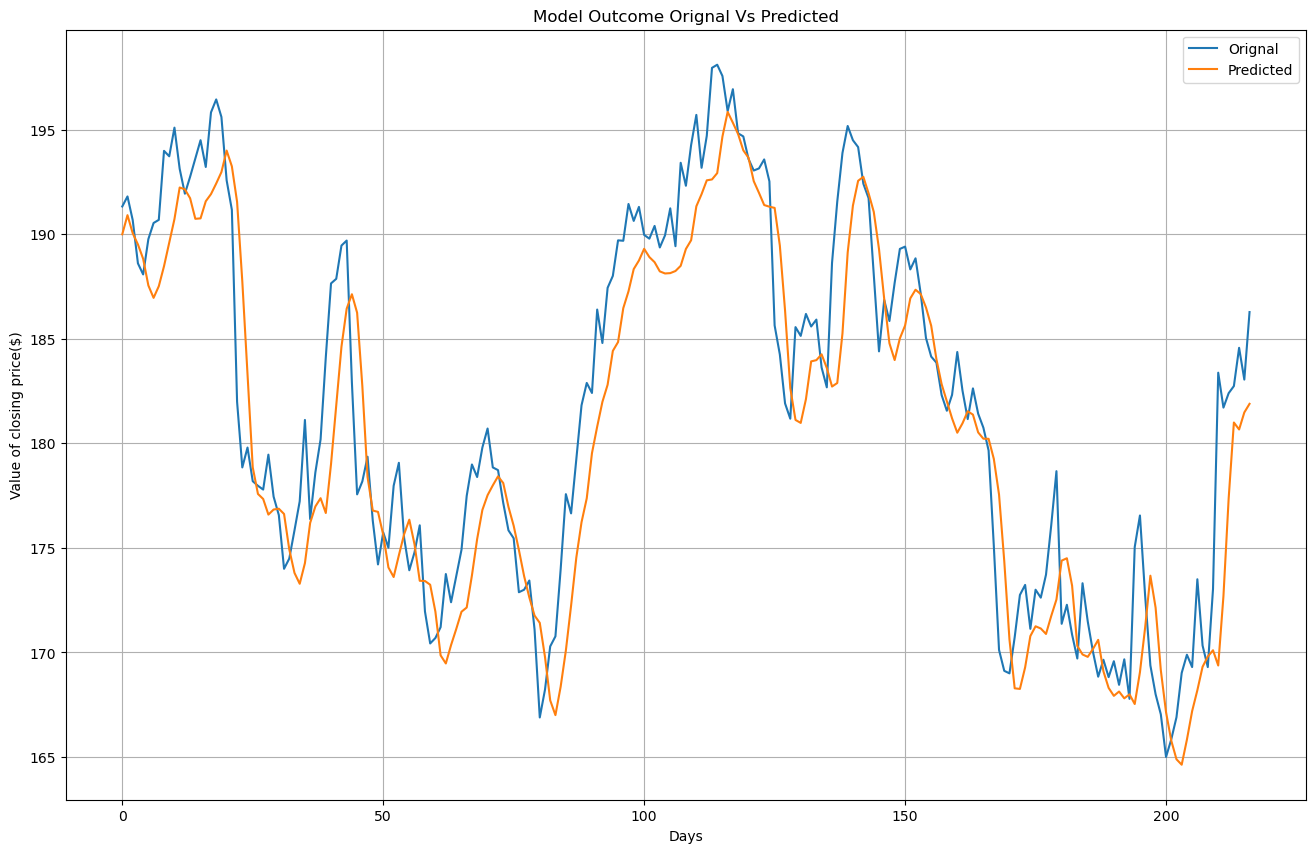

In [83]:
df_compare = df_compare.reset_index(drop = True)
plt.figure(figsize=(16,10))
plt.plot(df_compare["Orignal"],label = "Orignal")
plt.plot(df_compare["Predicted"],label = 'Predicted')
plt.xlabel("Days")
plt.ylabel("Value of closing price($)")
plt.title("Model Outcome Orignal Vs Predicted")
plt.legend()
plt.grid(True)
plt.show()